# Final Project Submission: Regression Models - KC Housing Data

Please fill out:
* Student name: Princess 'Seun' Otusanya
* Student pace: Self Paced
* Scheduled project review date/time: January 26, 2021. 4:00PM
* Instructor name: Jeff Herman
* Blog post URL: 


## Objective
In this Jupyter notebook we will finally be working on Linear Regression and finding the best fit model for our business case. The order of business is as follows: 
- Linear Regression
- Feature Selection
- Train-Test Split
- Cross Validation

### Import neccesary Libraries and Load Data

In [1]:
# Let's start by importing nessesary libraries
import pandas as pd
import numpy as np

# For visualizations
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

# For regression
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
# Import new and improved data and drop extra default index
kc_reg = pd.read_csv('Data/kc_reg.csv')
kc_reg.drop(['Unnamed: 0'], axis=1, inplace=True)
# Print top 5 rows to ensure data loads properly
kc_reg.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,yr_built,...,sqft_living15,sqft_lot15,basement,renovated,distance_from_bellevue,floor_1_5,floor_2_0,floor_2_5,floor_3_0,floor_3_5
0,221900.0,3,1.0,1180,5650,0.0,0.0,3,7,1955,...,1340,5650,0,0,7.622786,0,0,0,0,0
1,538000.0,3,2.5,2570,7242,0.0,0.0,3,7,1951,...,1690,7639,1,1,9.041882,0,1,0,0,0
2,180000.0,2,1.0,770,10000,0.0,0.0,3,6,1933,...,2720,8062,0,0,8.561145,0,0,0,0,0
3,604000.0,4,3.0,1960,5000,0.0,0.0,5,7,1965,...,1360,5000,1,0,10.979730,0,0,0,0,0
4,510000.0,3,2.0,1680,8080,0.0,0.0,3,8,1987,...,1800,7503,0,0,7.402273,0,0,0,0,0


#### Recap
A couple of things to remember from the previous notebook before getting started on Regression:
* No variable is 'perfectly' normal but 'sqft_living' comes pretty close.
* There are 2 predictors that are highly Correlated: 'sqft_living' and 'sqft_above'.
* Dummy variables have been created for _Norminal_ categorical variables.

## Linear Regression
Let's perform a series of simple regressions between the target variable and some predictors.

### Step 1: Check Distribution

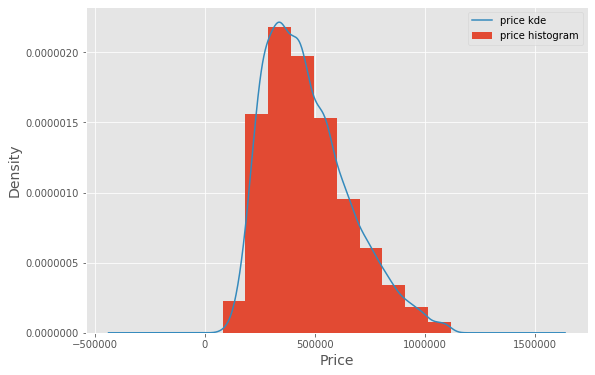

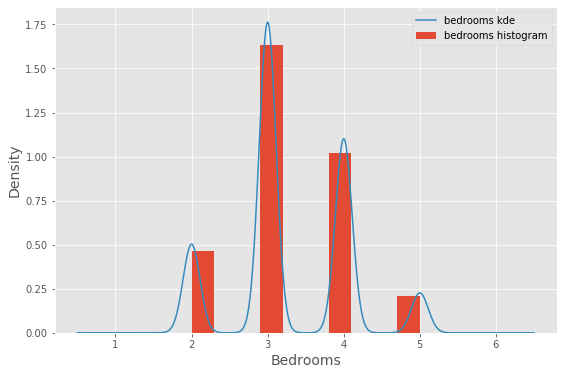

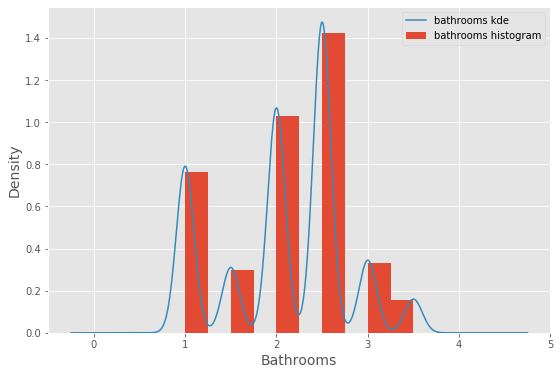

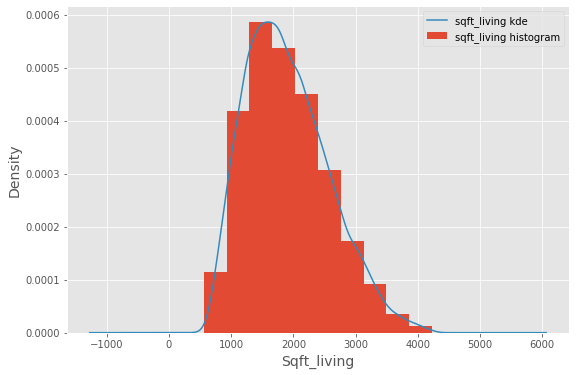

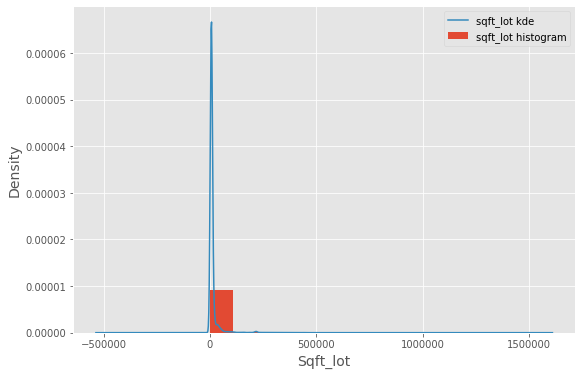

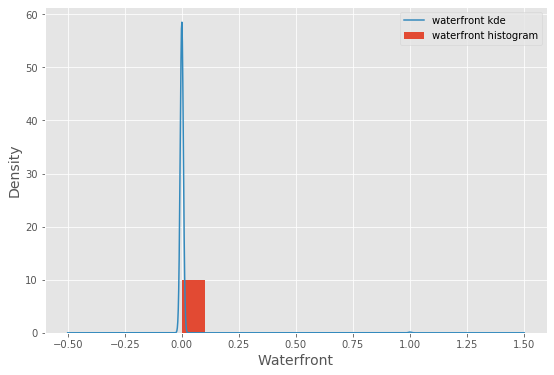

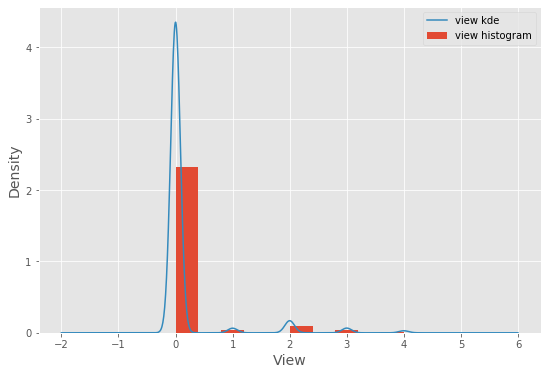

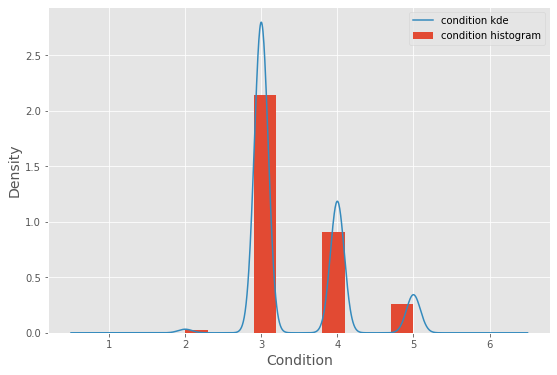

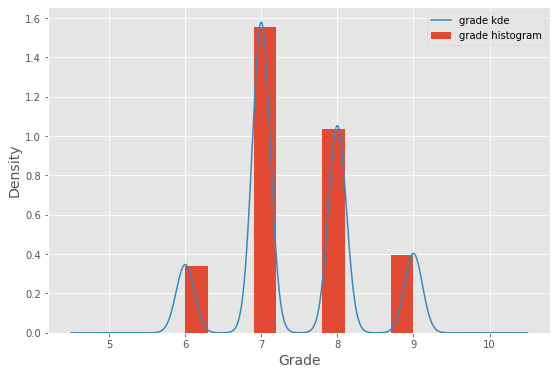

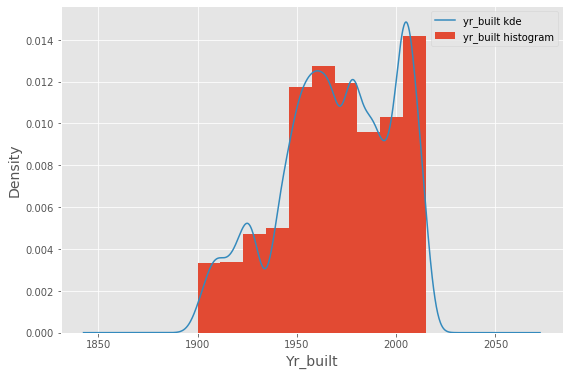

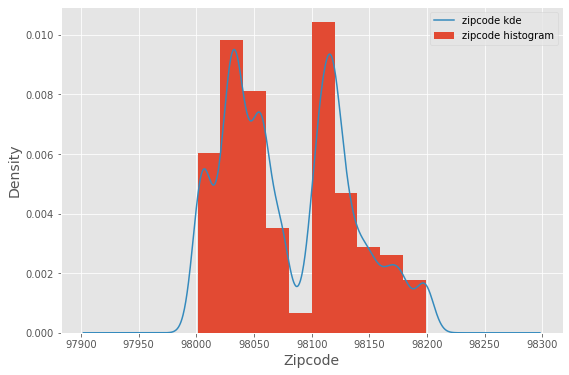

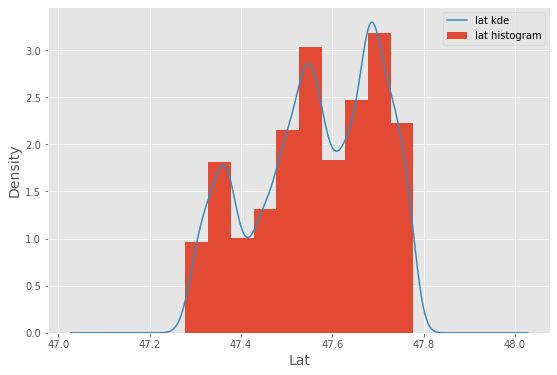

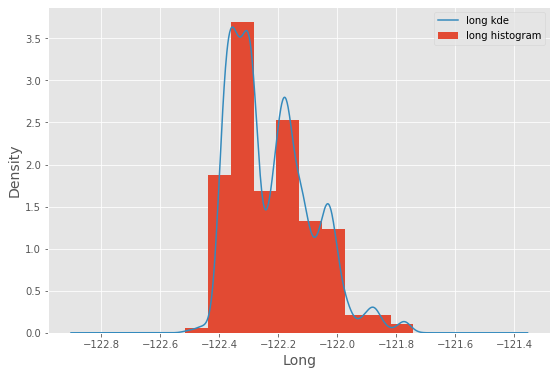

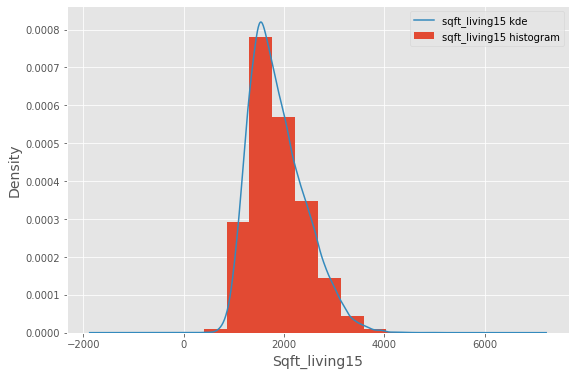

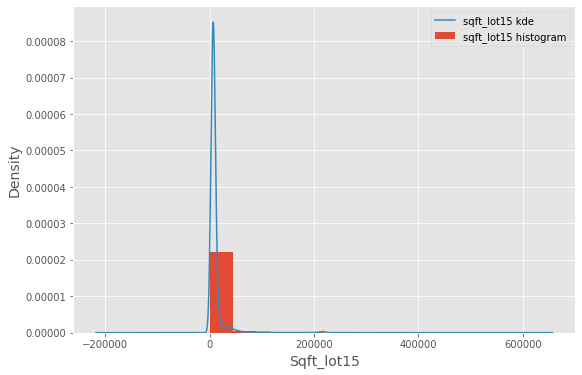

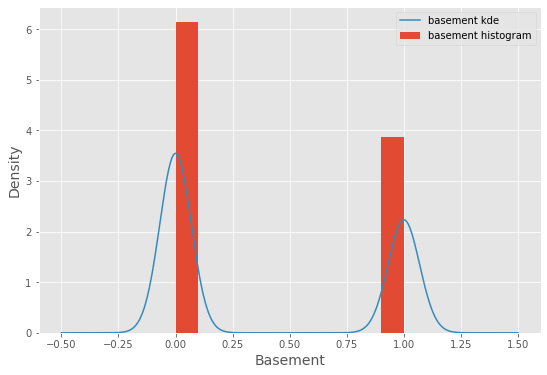

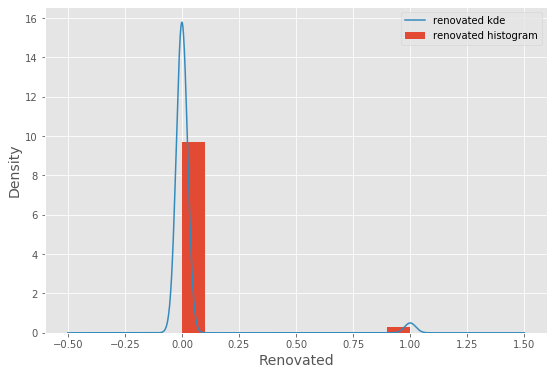

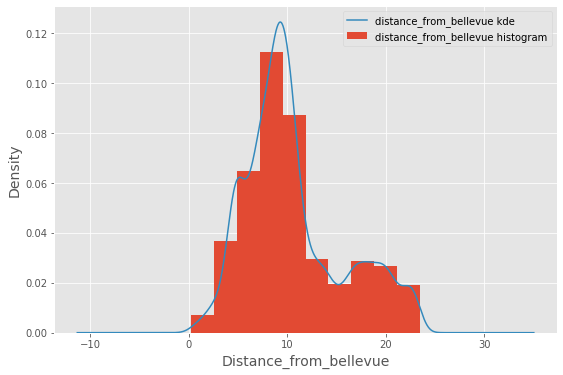

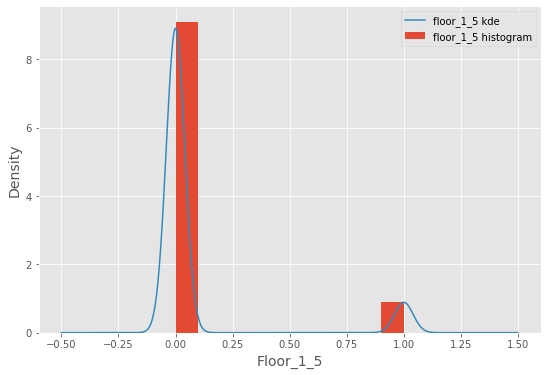

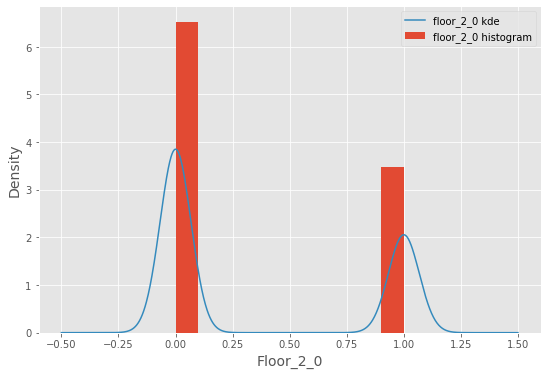

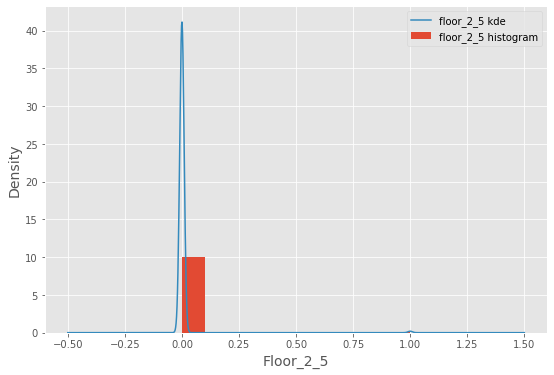

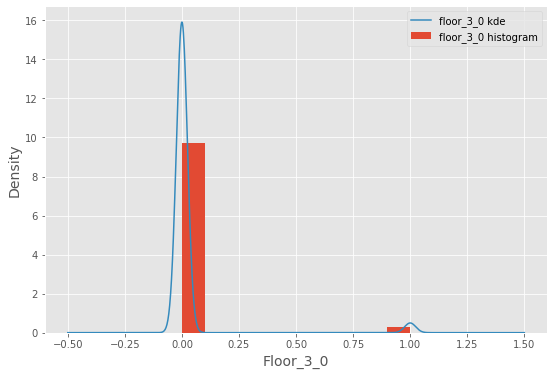

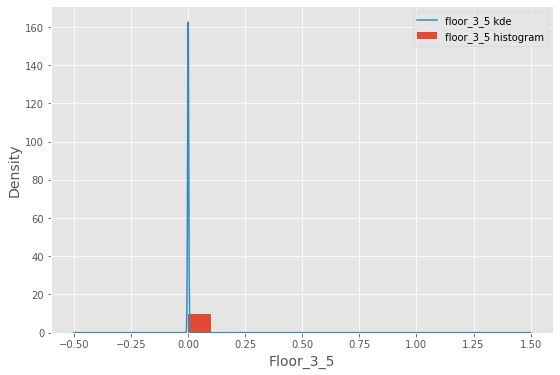

In [3]:
# Plot histograms with kde overlay to check the distributions of the predictors again
for column in kc_reg:
    plt.style.use('ggplot')
    plt.figure(figsize=(9,6))
    kc_reg[column].plot.hist(density=True, label = column+' histogram')
    kc_reg[column].plot.kde(label =column+' kde')
    plt.xlabel(f'{column.capitalize()}', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.legend()
    plt.show()

The results are the same as we saw with the density plots we made in the EDA notebook:
- The target variable 'price' is slightly skewed to the right.
- Of all the predictors 'sqft_living' and 'sqft_living15_ are almost perfectly normal.
- The rest of the features are majorly skew

### Step 2: Test for Linearity Assumptions
There are 3 assumptions for Linear Regression: _Linearity_, _Normality_, and _Homoscedasticity_. We can check for them by performing the following steps:
- Run a simple regression in Statsmodel wtih the dependent and independent variables
- Plot a prediction line on a scatter plot with the dependent and independent variables
- Visualize the error term for variance and heteroscedasticity
- Check the normality assumptions by creating a QQ-plot

In [4]:
# Build a formula. 'sqft_living' is the most normally distributed variable so we'll start with that
f = 'price~sqft_living'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     7668.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:01   Log-Likelihood:            -2.3365e+05
No. Observations:               17436   AIC:                         4.673e+05
Df Residuals:                   17434   BIC:                         4.673e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.64e+05   3655.517     44.865      0.000    1.57e+05    1.71e+05
sqft_living   158.7498      1.813     87.565      0.000     155.196     162.303
==============================================================================
Omnibus:                      998.120   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1177.650
Skew:                           0.617   Prob(JB):                    1.89e-256
Kurtosis:                       3.314   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

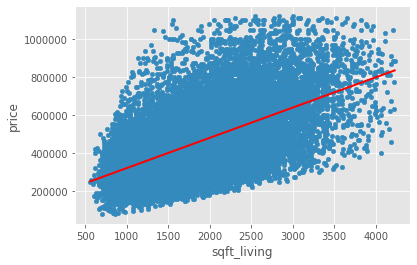

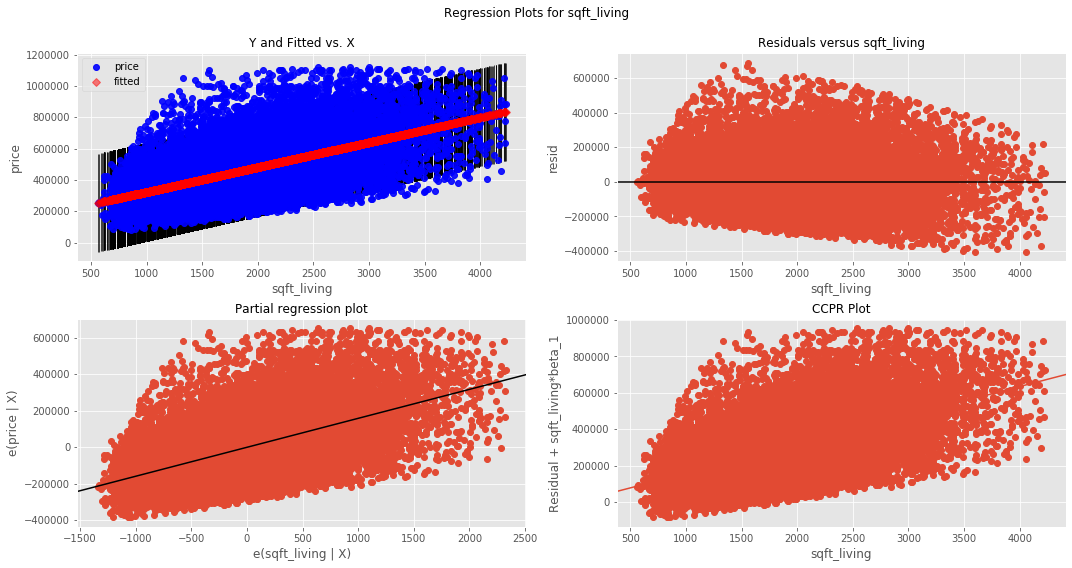

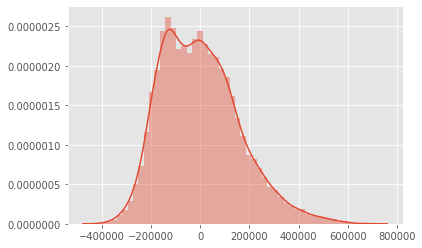

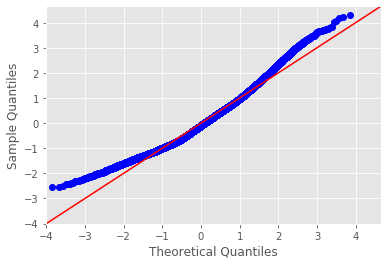

In [5]:
# Create a new Dataframe with the minimum and maximum value of 'sqft_living'
X_new = pd.DataFrame({'sqft_living': [kc_reg.sqft_living.min(), kc_reg.sqft_living.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='sqft_living', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.235_ i.e, _24%_ of the variance in the target variable can be explained by 'sqft_living'. 
- R-squared(Coefficient of determination) also tells us that as a predictor, 'sqft_living' is a _poor fit_ as 0.24 is so close to 0. 
- If we _increase_ 'sqft_living' by 1 unit we can expect the price of a house to _increase_ by _151_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words a changes in 'sqft_living' are related to changes in 'price'.
- If we observe the regression plots we can see a cone-like shape which suggests that the residuals are heteroscedastic. This violates an assumption.
- A normally distributed data has a Skewness between -0.5 and 0.5 and a Kurtosis of 3. The model tells us that we have a Skewness of 0.58 and a Kurtosis of 3 which are pretty good numbers and with a pretty good _QQ plot_ the normality assumption seems fulfilled.

In [6]:
# Build a formula. 
f = 'price~lat'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4128.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:04   Log-Likelihood:            -2.3497e+05
No. Observations:               17436   AIC:                         4.700e+05
Df Residuals:                   17434   BIC:                         4.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.933e+07   4.64e+05    -63.244      0.000   -3.02e+07   -2.84e+07
lat         6.264e+05   9749.301     64.249      0.000    6.07e+05    6.45e+05
==============================================================================
Omnibus:                     1765.138   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2378.221
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                       3.674   Cond. No.                     1.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

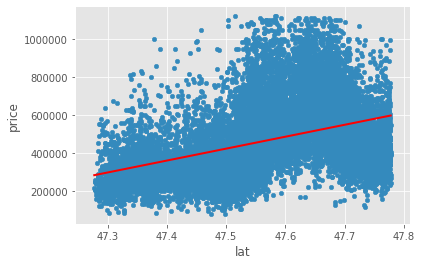

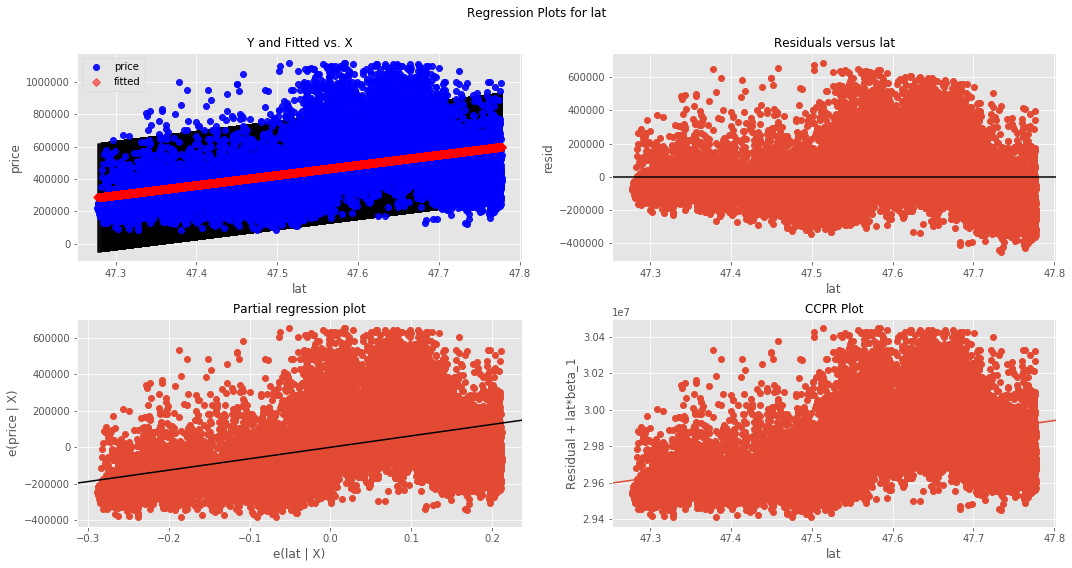

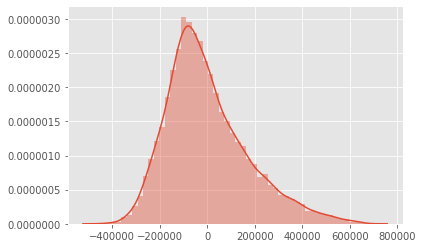

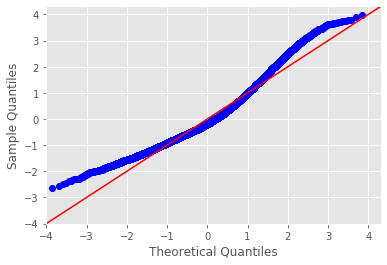

In [7]:
# Create a new Dataframe with the minimum and maximum value of 'lat'
X_new = pd.DataFrame({'lat': [kc_reg.lat.min(), kc_reg.lat.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='lat', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'lat', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.244_ i.e, _24%_ of the variance in the target variable can be explained by 'lat'. 
- R-squared(Coefficient of determination) also tells us that as a predictor, 'lat' is also _poor fit_ as _0.24_ is so close to 0. 
- If we _increase_ 'lat' by 1 unit we can expect the price of a house to _increase_ by _624800_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words a changes in 'lat' are related to changes in 'price'.
- The residual is not evenly distributed across the graph, which violates the Homoscedasticity assumption.
- There is a Skewness of 0.793 which tells us that the data is moderately skewed to the right. The _QQ plot_ looks pretty good so the normality assumption seems fulfilled.

In [8]:
# Build a formula.
f = 'price~distance_from_bellevue'
# Create a fitted model
model = smf.ols(formula=f, data=kc_reg).fit()
# Get regression model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     5570.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:08   Log-Likelihood:            -2.3441e+05
No. Observations:               17436   AIC:                         4.688e+05
Df Residuals:                   17434   BIC:                         4.688e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               6.639e+05   2936.232    226.091      0.000    6.58e+05     6.7e+05
distance_from_bellevue -1.867e+04    250.193    -74.632      0.000   -1.92e+04   -1.82e+04
==============================================================================
Omnibus:                     1132.541   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1371.643
Skew:                           0.654   Prob(JB):                    1.42e-298
Kurtosis:                       3.423   Cond. No.                         27.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

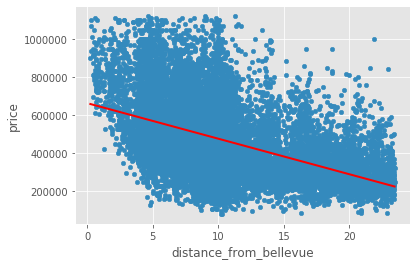

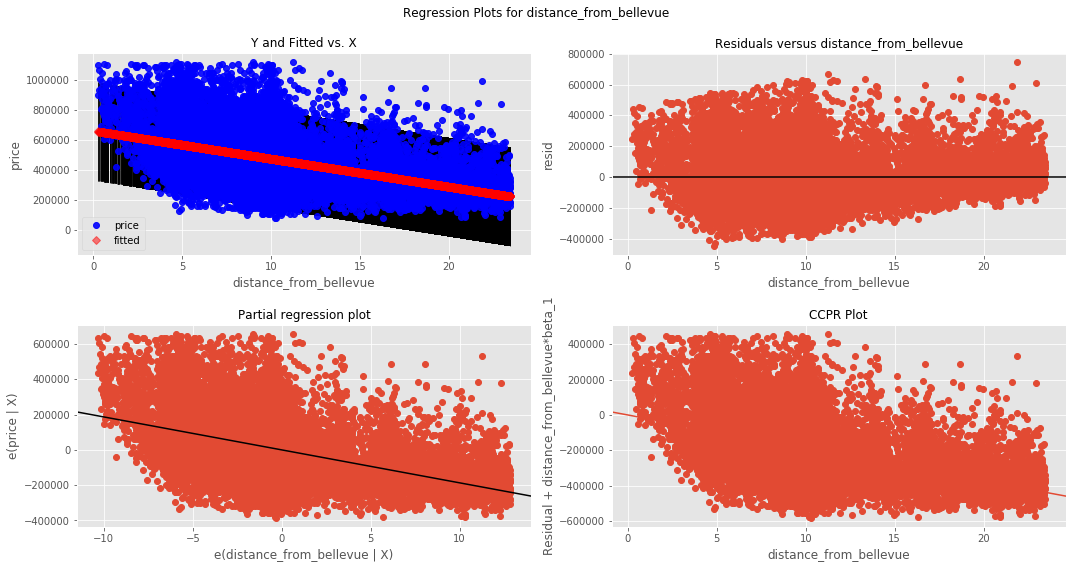

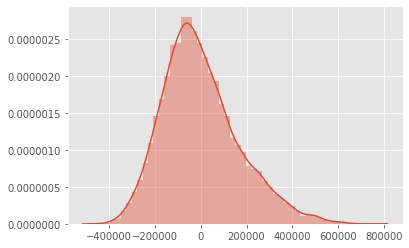

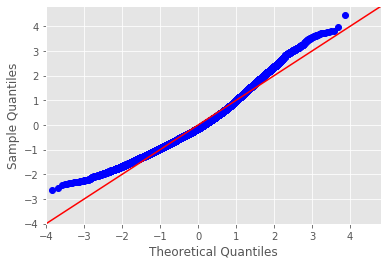

In [9]:
# Create a new Dataframe with the minimum and maximum value of 'grade'
X_new = pd.DataFrame({'distance_from_bellevue': [kc_reg.distance_from_bellevue.min(), 
                                                 kc_reg.distance_from_bellevue.max()]});
# Make predictions on the x values and store them 
preds = model.predict(X_new)
# Plot the observed data and the least squares line
kc_reg.plot(kind='scatter', x='distance_from_bellevue', y='price');
plt.plot(X_new, preds, c='red', linewidth=2);
plt.show()
# Visualize error terms for variance and heteroscedasticity
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'distance_from_bellevue', fig=fig)
plt.show()
# Show distribution of residuals
sns.distplot(model.resid)
# Create qq plot to check normality assuption
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

#### Insights:
- The _R-squared_ value is _0.25_ i.e, _25%_ of the variance in the target variable can be explained by 'grade'.
- Just like 'sqft_living' and 'lat', 'grade' is also a poor fit.
- If we _increase_ 'grade' by 1 unit we can expect the price of a house to _increase_ by _118900_.
- The _P-value_ tells us that we can reject the null hypothesis that the _Coefficient = 0_. In other words changes in 'grade' are related to changes in 'price'.
- Based on the _QQ plot_ and residual distribution the normality assumption is fufilled.

> **We don't seem to have any reasonable single Linear Regressions, so we can move on to Multiple regression.**

## Multiple Regression
In order to construct a well functioning Multiple regression model we have to go through some prerequisites:
- Deal with **Categorical data**. Which we've already did in the EDA notebook.
- Handle **Multicollinearity of Features**. If we recall from the EDA notebook we found out the 'sqft_living' and 'sqft_above' are highly correlated. The best option is to get rid of one of the features but I've decided to keep them both as long as they are not used in the same model as this could affect our results.
- **Feature Selection** is another step we can apply to our model when necessary. All features are important to a certain degree but not all of them are absolutely necessary so this step will help us weed out the features that may not be significant to our model.
- **Feature Scaling and Normalization** is another important step in the process. We have a variety of Independent variables that happen to be on different scales, for example, we have 'bedrooms' ranging from 2 to 5 and on the other hand we have 'sqft_living' ranging roughly around 500 to 4000. 'sqft_living' is clearly on a larger scale and can be interpreted as more significant to the target variable than 'bedrooms'. Scaling and normalization can help avoid that.
- **Train-Test Split** to make sure we are not _overfitting_ or _underfitting_ the model to the dataset.

### Modeling for Inference
When modeling for _Inference_ we want to know how a change in _X(independent)_ affects and changes _Y(dependent)_. We are more concerned with the _Coefficients_ of the features than the predictive accuracy of the model.


In [10]:
# Let's first build a model with all the features as is.
# Define X and Y
X = kc_reg.drop(['price'], axis=1)
y = kc_reg['price']

# Show model summary table
X_int = sm.add_constant(X)
model = sm.OLS(y, X_int).fit()
model.summary()

/usr/local/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     1833.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:12   Log-Likelihood:            -2.2638e+05
No. Observations:               17436   AIC:                         4.528e+05
Df Residuals:                   17413   BIC:                         4.530e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   6.354e+06   1.74e+06      3.651      0.000    2.94e+06    9.77e+06
bedrooms               -1.489e+04   1326.944    -11.221      0.000   -1.75e+04   -1.23e+04
bathrooms               1.695e+04   1942.652      8.726      0.000    1.31e+04    2.08e+04
sqft_living               84.9452      2.371     35.831      0.000      80.298      89.592
sqft_lot                   0.3123      0.039      7.984      0.000       0.236       0.389
waterfront              1.563e+05   1.74e+04      8.966      0.000    1.22e+05    1.91e+05
view                    3.221e+04   1463.999     22.004      0.000    2.93e+04    3.51e+04
condition               2.466e+04   1387.615     17.772      0.000    2.19e+04    2.74e+04
grade                   6.925e+04   1476.207     46.914      0.000    6.64e+04    7.21e+04
yr_built               -1381.3009     48.196    -28.660      0.000   -1475.771   -1286.831
zipcode                 -205.3356     19.479    -10.541      0.000    -243.517    -167.155
lat                     2.695e+05   8367.671     32.212      0.000    2.53e+05    2.86e+05
long                   -2.799e+04   8346.322     -3.353      0.001   -4.43e+04   -1.16e+04
sqft_living15             42.4094      2.308     18.378      0.000      37.886      46.933
sqft_lot15                -0.0244      0.055     -0.446      0.656      -0.132       0.083
basement                2968.8829   2024.109      1.467      0.142    -998.574    6936.340
renovated               3.857e+04   4880.377      7.904      0.000     2.9e+04    4.81e+04
distance_from_bellevue -1.165e+04    227.223    -51.269      0.000   -1.21e+04   -1.12e+04
floor_1_5               3.138e+04   3133.640     10.014      0.000    2.52e+04    3.75e+04
floor_2_0               3.126e+04   2456.943     12.723      0.000    2.64e+04    3.61e+04
floor_2_5               6.342e+04   1.19e+04      5.332      0.000    4.01e+04    8.67e+04
floor_3_0               5.575e+04   5542.327     10.059      0.000    4.49e+04    6.66e+04
floor_3_5               3.113e+04   4.73e+04      0.659      0.510   -6.15e+04    1.24e+05
==============================================================================
Omnibus:                     1334.845   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2313.945
Skew:                           0.568   Prob(JB):                         0.00
Kurtosis:                       4.376   Cond. No.                     2.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The Goodness of fit/ $ R^2 $ is **0.638** or **64%**, with all the features. The goal of this project is to find which features impact our target variable the most. Feature selection is a way to isolate the features that impact the target variable the most.

In [11]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)

selector = selector.fit(X, y)

In [12]:
selector.support_ * np.array(X.columns)

array(['', '', '', '', 'waterfront', '', '', 'grade', '', '', 'lat', '',
       '', '', '', 'renovated', '', '', '', '', 'floor_3_0', ''],
      dtype=object)

In [13]:
formula = 'price ~ lat + grade +  floor_1_5 + renovated + sqft_living + yr_built'
model = smf.ols(formula=formula, data=kc_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     4548.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:12   Log-Likelihood:            -2.2861e+05
No. Observations:               17436   AIC:                         4.572e+05
Df Residuals:                   17429   BIC:                         4.573e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.228e+07   3.54e+05    -62.920      0.000    -2.3e+07   -2.16e+07
lat            5.3e+05   6980.923     75.916      0.000    5.16e+05    5.44e+05
grade        9.591e+04   1548.346     61.944      0.000    9.29e+04    9.89e+04
floor_1_5    1.269e+04   3471.382      3.657      0.000    5888.913    1.95e+04
renovated     3.34e+04   5398.942      6.187      0.000    2.28e+04     4.4e+04
sqft_living   108.2390      1.768     61.211      0.000     104.773     111.705
yr_built    -1717.2154     40.441    -42.462      0.000   -1796.484   -1637.947
==============================================================================
Omnibus:                     1734.156   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3255.349
Skew:                           0.673   Prob(JB):                         0.00
Kurtosis:                       4.634   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
formula = 'price ~ lat + grade +  floor_1_5 + renovated + sqft_living + yr_built + condition + sqft_living15'
model = smf.ols(formula=formula, data=kc_reg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     3647.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:13   Log-Likelihood:            -2.2825e+05
No. Observations:               17436   AIC:                         4.565e+05
Df Residuals:                   17427   BIC:                         4.566e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.337e+07   3.52e+05    -66.448      0.000   -2.41e+07   -2.27e+07
lat            5.405e+05   6856.924     78.833      0.000    5.27e+05    5.54e+05
grade          8.839e+04   1564.394     56.502      0.000    8.53e+04    9.15e+04
floor_1_5      1.902e+04   3408.815      5.580      0.000    1.23e+04    2.57e+04
renovated      5.335e+04   5361.471      9.951      0.000    4.28e+04    6.39e+04
sqft_living      82.4064      2.055     40.102      0.000      78.379      86.434
yr_built      -1462.7226     42.282    -34.594      0.000   -1545.600   -1379.845
condition      2.681e+04   1507.362     17.785      0.000    2.39e+04    2.98e+04
sqft_living15    50.4345      2.395     21.054      0.000      45.739      55.130
==============================================================================
Omnibus:                     1644.362   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2957.001
Skew:                           0.658   Prob(JB):                         0.00
Kurtosis:                       4.529   Cond. No.                     1.34e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
formula = 'price ~ lat + sqft_living + grade + condition + floor_1_5 + renovated + sqft_living15 + distance_from_bellevue'
model = smf.ols(formula=formula, data=kc_reg).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     4228.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:34:13   Log-Likelihood:            -2.2742e+05
No. Observations:               17436   AIC:                         4.549e+05
Df Residuals:                   17427   BIC:                         4.549e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.306e+07   4.13e+05    -31.622      0.000   -1.39e+07   -1.23e+07
lat                     2.689e+05   8646.389     31.101      0.000    2.52e+05    2.86e+05
sqft_living               84.3003      1.959     43.032      0.000      80.460      88.140
grade                    6.52e+04   1405.756     46.383      0.000    6.24e+04     6.8e+04
condition               3.739e+04   1353.826     27.621      0.000    3.47e+04       4e+04
floor_1_5               5.399e+04   3021.087     17.870      0.000    4.81e+04    5.99e+04
renovated               9.175e+04   4938.574     18.577      0.000    8.21e+04    1.01e+05
sqft_living15             48.0768      2.285     21.043      0.000      43.599      52.555
distance_from_bellevue -1.273e+04    230.377    -55.275      0.000   -1.32e+04   -1.23e+04
==============================================================================
Omnibus:                     1853.641   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3123.602
Skew:                           0.749   Prob(JB):                         0.00
Kurtosis:                       4.435   Cond. No.                     1.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As we know this dataset contains Features that vary in magnitude, this can give false impressions that some features are more important than others and this can be damaging to the model. To prevent this let's try _Feature Scaling_ to see if it improves our model.